In [1]:
import numpy as np
import torch
from torchvision.datasets import MNIST        
import torchvision.transforms as transforms

dir_MNIST = '/home/hhg/Research/machine_learning/data'

# trainsforms

In [2]:
trainset = MNIST(root=dir_MNIST, train=True)
print(f'Min Pixel Value: {trainset.data.min()} \nMax Pixel Value: {trainset.data.max()}')
print(f'Mean Pixel Value {trainset.data.float().mean()} \nPixel Values Std: {trainset.data.float().std()}')
print(f'Scaled Mean Pixel Value {trainset.data.float().mean() / 255} \nScaled Pixel Values Std: {trainset.data.float().std() / 255}')

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
image, label = train_loader.dataset.__getitem__(10)
image_npy = np.array(image)

print('\n --- train_loader ---')
print(f'Min Pixel Value: {image_npy.min()} \nMax Pixel Value: {image_npy.max()}')

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624

 --- train_loader ---
Min Pixel Value: 0 
Max Pixel Value: 254


In [3]:
trainset = MNIST(root=dir_MNIST, train=True, transform=transforms.ToTensor())
print(f'Min Pixel Value: {trainset.data.min()} \nMax Pixel Value: {trainset.data.max()}')
print(f'Mean Pixel Value {trainset.data.float().mean()} \nPixel Values Std: {trainset.data.float().std()}')
print(f'Scaled Mean Pixel Value {trainset.data.float().mean() / 255} \nScaled Pixel Values Std: {trainset.data.float().std() / 255}')

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
image, label = train_loader.dataset.__getitem__(10)
image_npy = np.array(image)

print('\n --- train_loader ---')
print(f'Min Pixel Value: {image_npy.min()} \nMax Pixel Value: {image_npy.max()}')

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624

 --- train_loader ---
Min Pixel Value: 0.0 
Max Pixel Value: 0.9960784316062927


In [4]:
img_trainsforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

trainset = MNIST(root=dir_MNIST, train=True, transform=img_trainsforms)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
image, label = train_loader.dataset.__getitem__(10)
image_npy = np.array(image)

print('\n --- train_loader ---')
print(f'Min Pixel Value: {image_npy.min()} \nMax Pixel Value: {image_npy.max()}')


 --- train_loader ---
Min Pixel Value: -1.0 
Max Pixel Value: 0.9921568632125854


# Display

In [5]:
import matplotlib.pyplot as plt

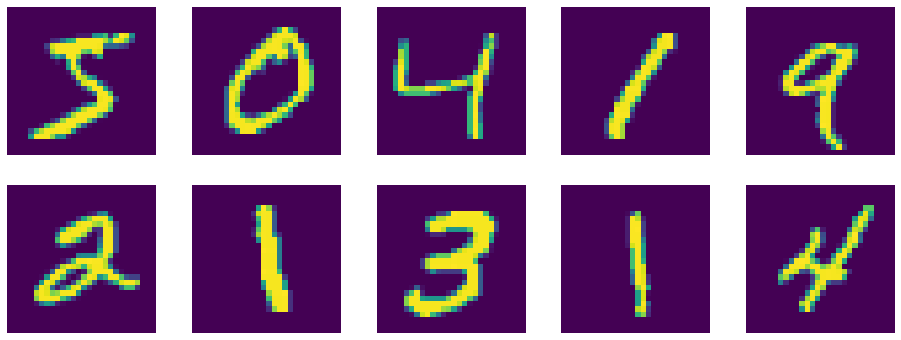

In [6]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy()) # image.squeeze().numpy().shape = (28, 28)
    #plt.imshow(image.numpy())          # image.numpy().shape           = (1, 28, 28)
    plt.axis('off');

label : 2 | image size : torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

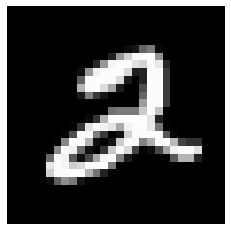

In [7]:
import torchvision.utils as vutils
# --- display single image ---
x, label = train_loader.dataset.__getitem__(5)
print(f'label : {label} | image size :', x.size())
plt.imshow(vutils.make_grid(x, normalize=True).numpy().transpose((1,2,0)))
plt.axis('off')